<a href="https://colab.research.google.com/github/RishiAbinandhan/CAR-PRICE-PREDICTION/blob/main/CAR_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTRODUCTION**


Welcome to our Car Price Prediction project! In today's automotive market, accurately determining the value of a used car can be challenging for both sellers and buyers. Factors such as the car's age, mileage, and condition, as well as market trends, can all influence its selling price. In this project, we address this challenge by leveraging machine learning techniques to develop a predictive model that can estimate the selling price of cars based on various features.

Our goal is to provide a reliable tool that empowers car sellers to set competitive prices and helps buyers make informed decisions. By analyzing historical data on car sales and their attributes, we aim to uncover patterns and relationships that can guide our predictive model.


### **IMPORTING THE LIBRARIES**

In [386]:
import warnings
warnings.filterwarnings('ignore')

In [387]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Data PreProcessing and Collection**

In [388]:
#Loading the dataset
dataset = pd.read_csv('CAR DATA.csv')

In [389]:
#Displaying the top 5 rows of the dataset
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [390]:
#Displaying the last 5 rows of the dataset
dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [391]:
#Shape of the dataset
dataset.shape

(301, 9)

In [392]:
print("Rows presented in the dataset: ",dataset.shape[0] )
print("Columns presented in the dataset: ",dataset.shape[1] )

Rows presented in the dataset:  301
Columns presented in the dataset:  9


In [393]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


## **Checking null values and removing duplicates**

In [394]:
#Checking for null values
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [395]:
#Checking for duplicated values
dataset.duplicated().sum()

2

In [396]:
#Dropping duplicate rows
dataset.drop_duplicates(inplace=True)

In [397]:
dataset.duplicated().sum()

0

In [398]:
#Statistical categorical features
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [399]:
dataset.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0


## **Adding a new column for lifespan of the model**

In [400]:
#Importing date time library for lifespan of the car
import datetime
date_time = datetime.datetime.now()
dataset['Age'] = date_time.year - dataset['Year']

In [401]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


## **Removing the outliers**

In [402]:
#Selecting categorical features
categorical_features=dataset[['Fuel_Type','Seller_Type','Transmission']]

<Axes: xlabel='Selling_Price'>

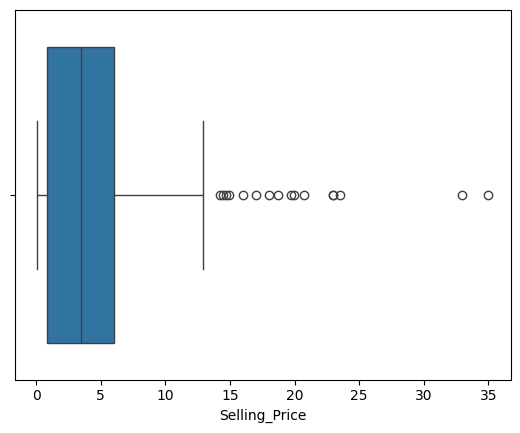

In [403]:
#Importing label encoder from preprocessing from sklearn import preprocessing
import seaborn as sns
sns.boxplot(x='Selling_Price',data=dataset)

In [404]:
#Checking for any outliers present in the target variable
sorted(dataset['Selling_Price'],reverse=True)

[35.0,
 33.0,
 23.5,
 23.0,
 23.0,
 20.75,
 19.99,
 19.75,
 18.75,
 18.0,
 17.0,
 16.0,
 14.9,
 14.73,
 14.5,
 14.25,
 12.9,
 12.5,
 11.75,
 11.5,
 11.45,
 11.25,
 11.25,
 11.25,
 10.9,
 10.25,
 10.11,
 9.7,
 9.65,
 9.5,
 9.25,
 9.25,
 9.25,
 9.15,
 9.1,
 8.99,
 8.75,
 8.65,
 8.55,
 8.5,
 8.4,
 8.4,
 8.35,
 8.25,
 8.25,
 7.9,
 7.75,
 7.75,
 7.5,
 7.5,
 7.5,
 7.45,
 7.45,
 7.45,
 7.4,
 7.25,
 7.25,
 7.2,
 7.05,
 6.95,
 6.85,
 6.75,
 6.7,
 6.6,
 6.5,
 6.5,
 6.45,
 6.4,
 6.25,
 6.25,
 6.15,
 6.1,
 6.0,
 6.0,
 6.0,
 6.0,
 5.95,
 5.95,
 5.9,
 5.85,
 5.85,
 5.8,
 5.75,
 5.75,
 5.65,
 5.5,
 5.5,
 5.5,
 5.5,
 5.5,
 5.4,
 5.4,
 5.35,
 5.3,
 5.3,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.25,
 5.2,
 5.15,
 5.11,
 5.0,
 4.95,
 4.95,
 4.9,
 4.9,
 4.85,
 4.8,
 4.8,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.75,
 4.65,
 4.6,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.5,
 4.4,
 4.4,
 4.4,
 4.35,
 4.15,
 4.1,
 4.1,
 4.0,
 4.0,
 4.0,
 4.0,
 4.0,
 3.95,
 3.95,
 3.9,
 3.9,
 3.8,
 3.75,
 3.75,
 3.65,
 3.6,
 3.51

In [405]:
#Filtering out outliers in the 'Selling_Proce' column
dataset = dataset[~(dataset['Selling_Price']>=33.0) & (dataset['Selling_Price']<=35.0)]

In [406]:
dataset.shape

(297, 10)

In [407]:
#Encoding the unique values of 'Fuel_Type','Seller_Type','Transmission'
dataset.head(1)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,10


## **Encoding to Unique values from our data**

In [408]:
dataset['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [409]:
dataset['Fuel_Type'] = dataset['Fuel_Type'].map({'Petrol':0,'Diesel':1,'CNG':2})

In [410]:
dataset['Fuel_Type'].unique()

array([0, 1, 2])

In [411]:
dataset['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [412]:
dataset['Seller_Type'] = dataset['Seller_Type'].map({'Dealer':0,'Individual':1})

In [413]:
dataset['Seller_Type'].unique()

array([0, 1])

In [414]:
dataset['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [415]:
dataset['Transmission'] = dataset['Transmission'].map({'Manual':0,'Automatic':1})

In [416]:
dataset['Transmission'].unique()

array([0, 1])

In [417]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,10
1,sx4,2013,4.75,9.54,43000,1,0,0,0,11
2,ciaz,2017,7.25,9.85,6900,0,0,0,0,7
3,wagon r,2011,2.85,4.15,5200,0,0,0,0,13
4,swift,2014,4.60,6.87,42450,1,0,0,0,10


In [418]:
#Splitting the feature and target variable
x = dataset.drop(['Car_Name','Selling_Price'],axis=1)
y = dataset['Selling_Price']

In [419]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 297, dtype: float64

## **DATA VISUALIZATION**

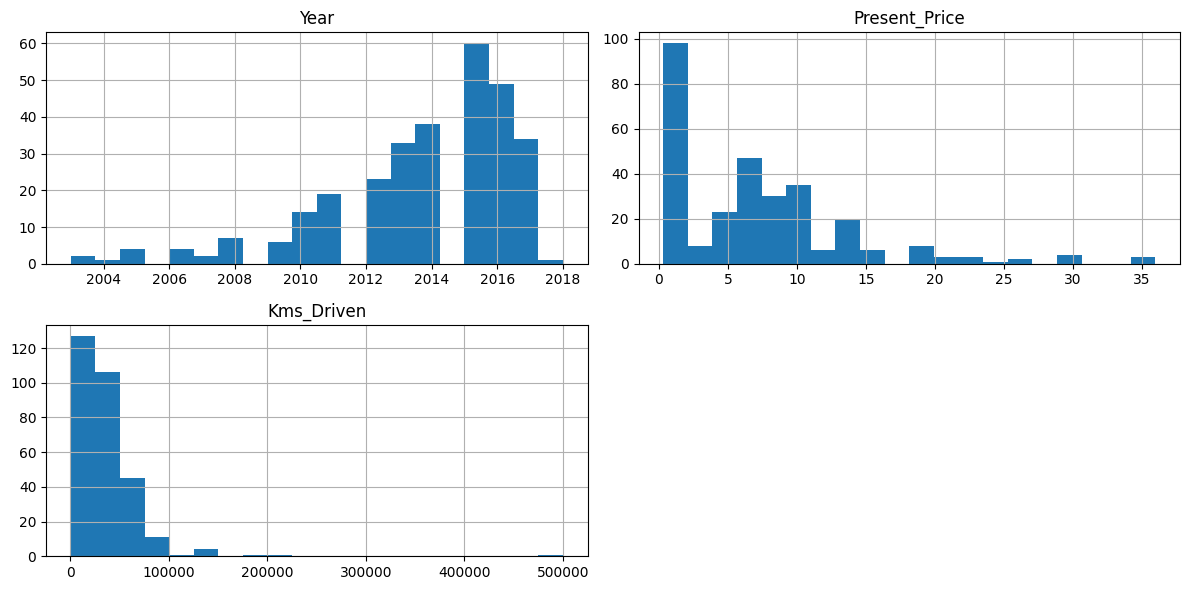

In [420]:
#Histograms
dataset[['Year','Present_Price','Kms_Driven']].hist(figsize=(12,6),bins=20)
plt.tight_layout()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of Numeric Features')
plt.show()

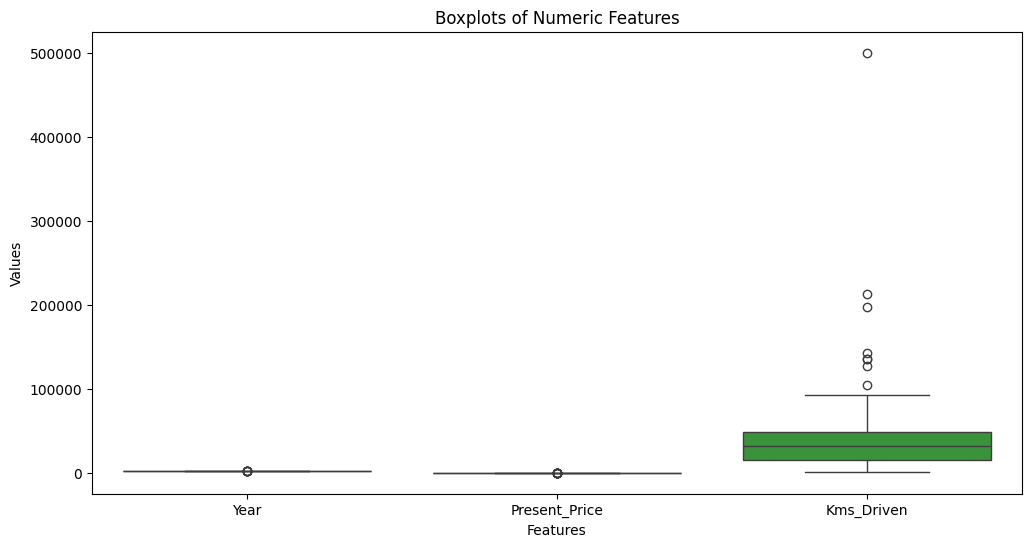

In [421]:
#Boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset[['Year','Present_Price','Kms_Driven']])
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Numeric Features')
plt.show()


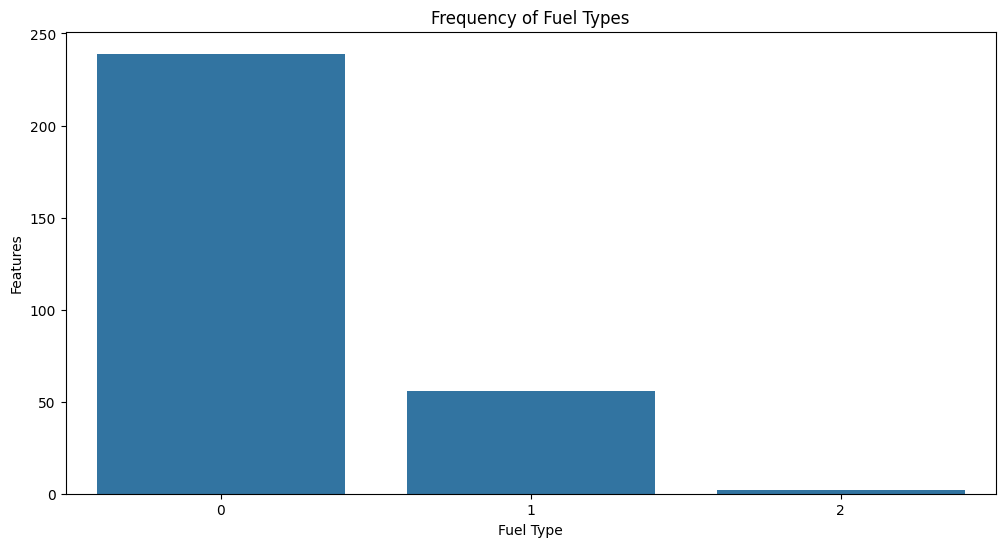

In [422]:
#Barplot
plt.figure(figsize=(12,6))
sns.countplot(x='Fuel_Type',data=dataset)
plt.xlabel('Fuel Type')
plt.ylabel('Features')
plt.title('Frequency of Fuel Types')
plt.show()

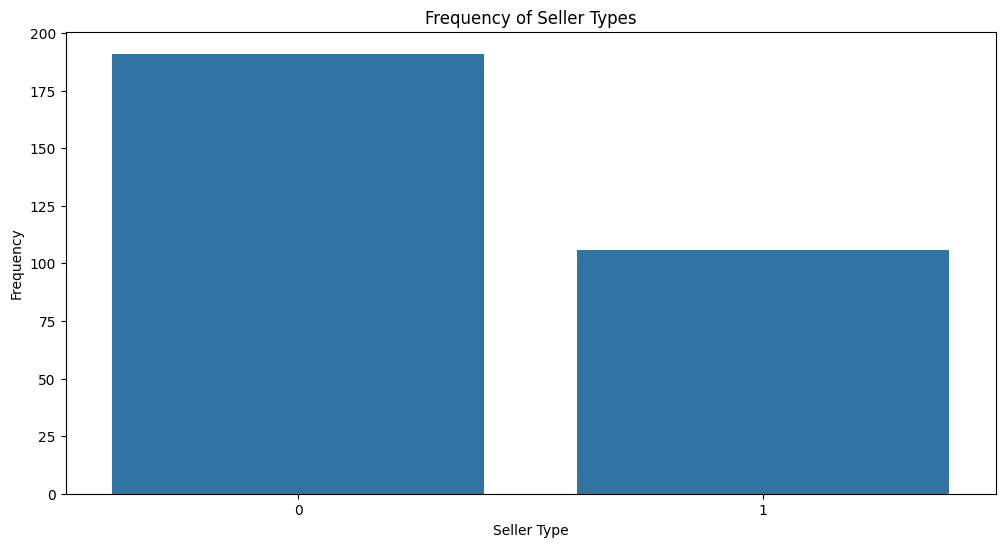

In [423]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Seller_Type', data=dataset)
plt.title('Frequency of Seller Types')
plt.xlabel('Seller Type')
plt.ylabel('Frequency')
plt.show()

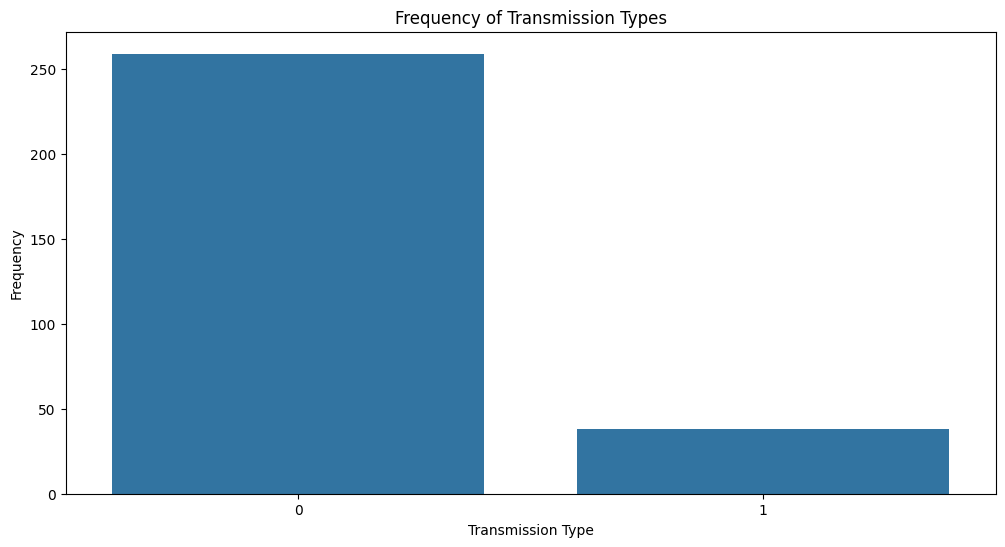

In [424]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Transmission', data=dataset)
plt.title('Frequency of Transmission Types')
plt.xlabel('Transmission Type')
plt.ylabel('Frequency')
plt.show()

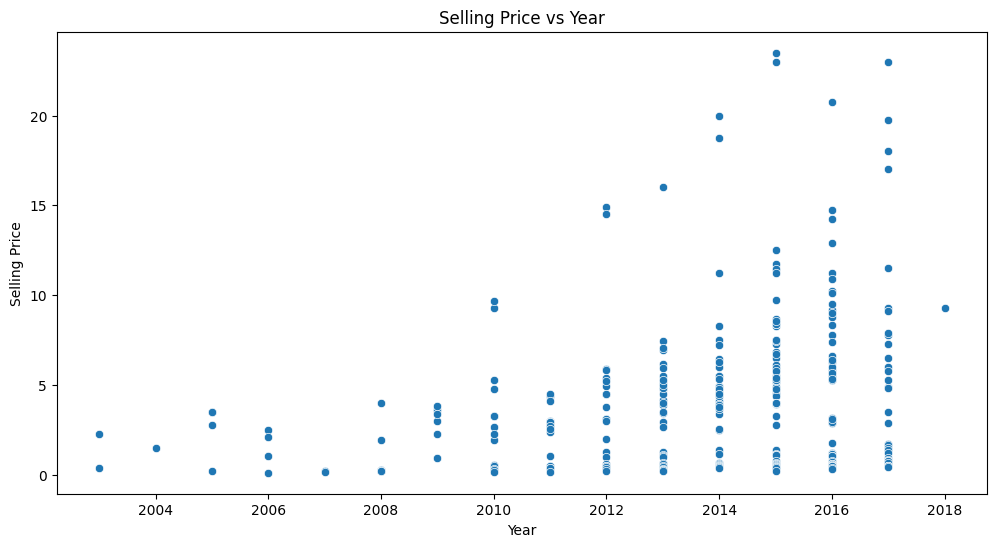

In [425]:
#Scatterplots
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Year', y='Selling_Price', data=dataset)
plt.title('Selling Price vs Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

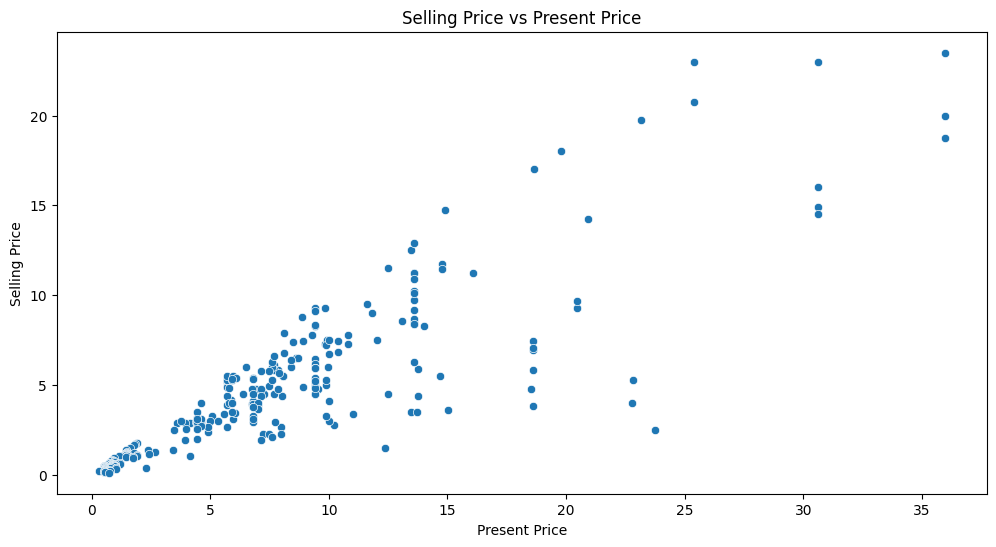

In [426]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=dataset)
plt.title('Selling Price vs Present Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

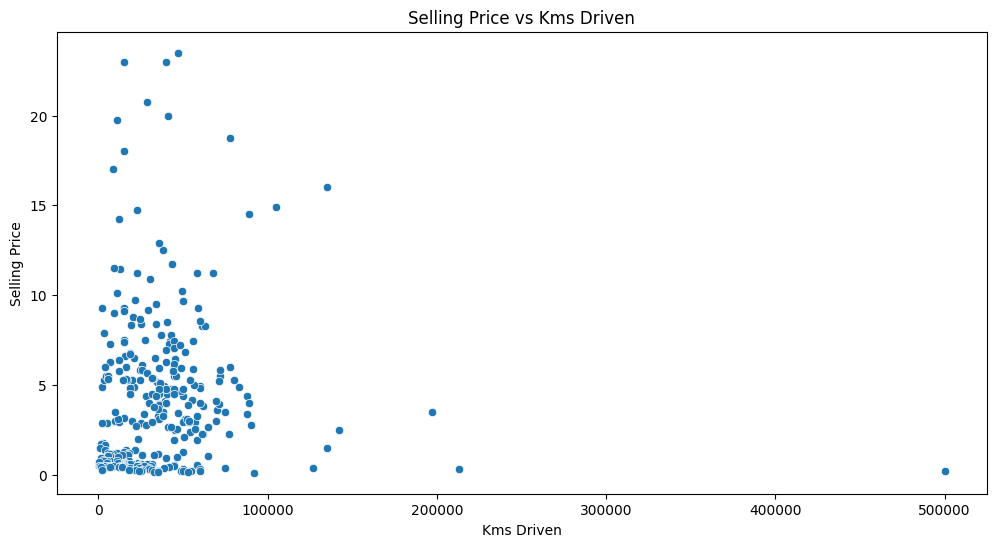

In [427]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Kms_Driven', y='Selling_Price', data=dataset)
plt.title('Selling Price vs Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Selling Price')
plt.show()

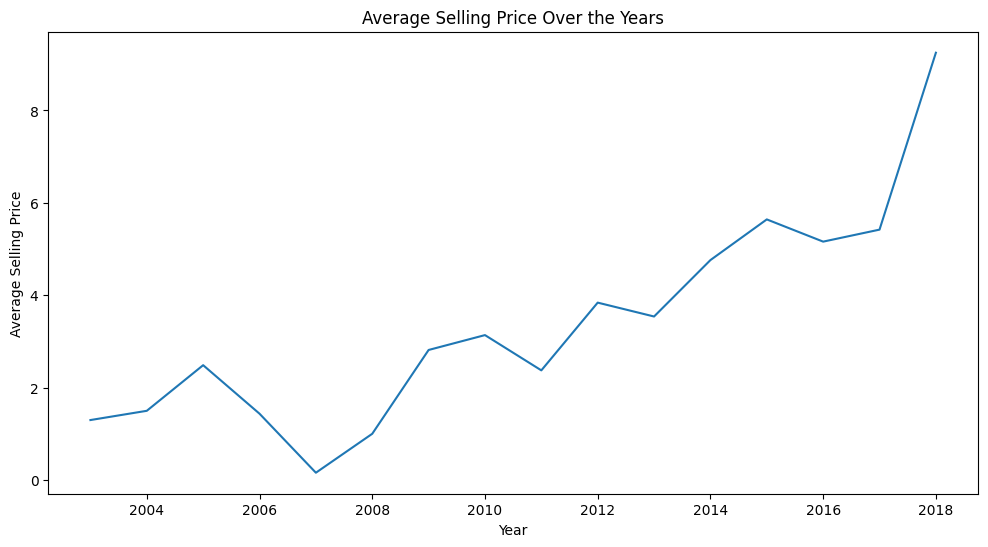

In [428]:
#Time Series Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Selling_Price', data=dataset.groupby('Year')['Selling_Price'].mean().reset_index())
plt.title('Average Selling Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.show()

## **Model Selection and Training**

In [429]:
#Importing necessary libraries for model selection
from sklearn.model_selection import train_test_split

In [430]:
#Splitting the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [431]:
#Imorting necessary Regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [432]:
#Instantiating and training the models
lr = LinearRegression()
lr.fit(x_train,y_train)

rf = RandomForestRegressor()
rf.fit(x_train,y_train)

gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

xg = XGBRegressor()
xg.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

## **Model Evaluation**

In [433]:
#Predicting using each model
y_pred1 = lr.predict(x_test)
y_pred2 = rf.predict(x_test)
y_pred3 = gbr.predict(x_test)
y_pred4 = xg.predict(x_test)

In [434]:
from sklearn import metrics

In [435]:
#R2 Score for each model
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [436]:
print(score1,score2,score3,score4)

0.6590115899167012 0.9592607780322578 0.9512401271877505 0.9515210996715666


In [437]:
#Storing the metrics values in a DataFrame
final_data = pd.DataFrame({'Models':['LR','RF','GBR','XG'],"R2_SCORE":[score1,score2,score3,score4]})

In [438]:
final_data

,Models,R2_SCORE
0,LR,0.659012
1,RF,0.959261
2,GBR,0.951240
3,XG,0.951521


<Axes: xlabel='Models', ylabel='R2_SCORE'>

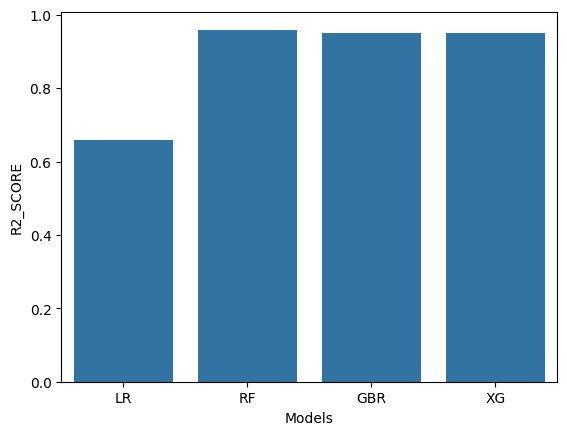

In [439]:
#Plotting R2_SCORE v
sns.barplot(x='Models',y='R2_SCORE', data=final_data)

In [440]:
#Builiding the predictive model with high accuracy of R2 SCORE anf fitting to rf Regressor
rf = RandomForestRegressor()
rf_final = rf.fit(x,y)

In [441]:
dataset.head(2)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,0,0,0,0,10
1,sx4,2013,4.75,9.54,43000,1,0,0,0,11


## **Building Predictive Model**

In [442]:
# User input for Predictive System
input_data = (2013,9.54,43000,1,0,0,0,11)

In [443]:
!# Changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

In [444]:
# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
input_data_reshaped = pd.DataFrame(input_data_reshaped, columns=x_train.columns)

In [445]:
# Prediction
prediction = rf.predict(input_data_reshaped)
print("The selling price of a car is:", prediction[0])

The selling price of a car is: 5.082299999999998


## **Saving the Model**

In [446]:
#Importing the pickle Library
import pickle as pic

In [447]:
# Saving the Model
filename = "car_Model.sav"
pic.dump(rf, open(filename, 'wb'))

In [448]:
#Loading the Model
loaded_model = pic.load(open(filename, 'rb'))

In [449]:
# Prediction using the loaded model
prediction = loaded_model.predict(input_data_reshaped)
print("The selling price of a car is:", prediction[0])

The selling price of a car is: 5.082299999999998


# **PROJECT SUMMARY**

Throughout this project, we embarked on a journey to develop a robust machine learning model for predicting car prices. We began by collecting and preprocessing a dataset containing information about different car attributes such as year of manufacture, present price, kilometers driven, fuel type, seller type, transmission, and owner history.

After exploring and cleaning the data, we engineered features and encoded categorical variables to prepare them for model training. We then selected multiple regression models, including Linear Regression, Random Forest Regression, Gradient Boosting Regression, and XGBoost Regression, and trained them on our preprocessed dataset.

Following model training, we evaluated each model's performance using metrics such as R-squared score and accuracy. Through extensive experimentation and fine-tuning, we identified the Random Forest Regression model as the most accurate predictor of car prices.

In conclusion, our project succeeded in developing a reliable machine learning model for predicting car prices, which can provide valuable insights for both car sellers and buyers in the used car market. By leveraging data-driven approaches, we aim to enhance transparency and efficiency in the car buying and selling process, ultimately benefiting consumers and industry stakeholders alike.# Importing warnings module to ignore warnings


